Test of cubic interpolation

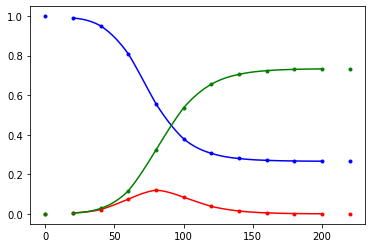

In [2]:
import numpy as np
import tensorflow as tf
import sys
sys.path.append("..")
from Test_Likelihood import cubic_interpolation as ci
import tensorflow_probability as tfp
import ODE_Dynamics as od

par=tf.constant(np.array([[1.8, 5.0E-08,0.1]], dtype=np.float32))
mod = od.SIR(par)
init_state=tf.constant(np.array([[0.001,0.999]], dtype=np.float32))
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,220.0,num=12,dtype=np.float32))
t0 = soln_times[0] ; dt = soln_times[1]-soln_times[0]

dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
r = len(results.states.shape)
p = (np.arange(r) + 1) % r
states = tf.transpose(results.states, perm=p) # time dimension last instead of first

interp_times = tf.constant(np.linspace(20.01,199.9,num=100,dtype=np.float32))
ifv = ci(interp_times, t0, dt, states)


%matplotlib inline
import matplotlib.pyplot as plt
t = results.times ; i = states[0,0,:] ; s = states[0,1,:] ; r = 1.0 - i - s
plt.plot(t, i,"r.", t, s, "b.", t, r, "g.")

ti = interp_times ; ii = ifv[0,0,:] ; si = ifv[0,1,:] ; ri = 1.0 - ii - si
plt.plot(ti, ii,"r-", ti, si, "b-", ti, ri, "g-")
